## 使用Scikit-learn中的MLPClassifier对葡萄酒数据集进行分类，并通过可视化特征边界来理解超参数对模型复杂度的影响

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
# 确保支持中文显示（如果特征名或标签名中有中文）
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

### 1. 特征选择

In [2]:
# 加载葡萄酒数据集
wine = load_wine()
X = wine.data[:, :2]  # 选择前两个特征
y = wine.target

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. 可视化

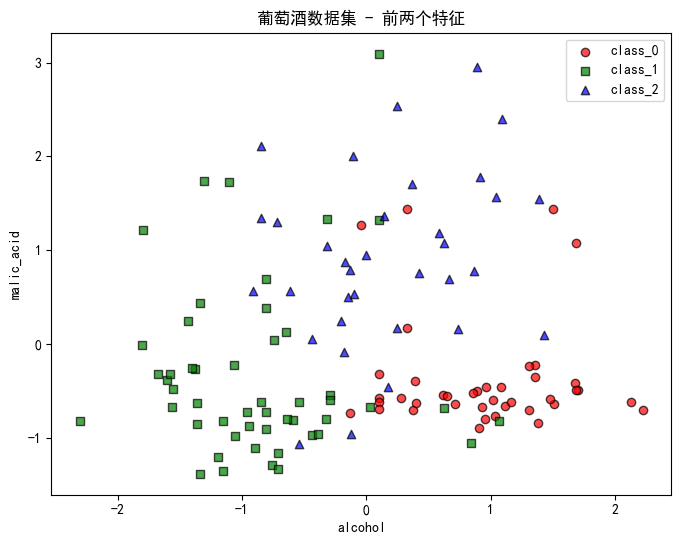

In [3]:
# 定义颜色和标记
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

# 绘制散点图
plt.figure(figsize=(8, 6))
for idx, cls in enumerate(np.unique(y)):
    plt.scatter(X_train_scaled[y_train == cls, 0], X_train_scaled[y_train == cls, 1],
                c=colors[idx], marker=markers[idx], label=wine.target_names[cls], edgecolor='k', alpha=0.7)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('葡萄酒数据集 - 前两个特征')
plt.legend()
plt.show()

In [4]:
### 绘制决策边界

def plot_decision_boundaries(model, X, y, title):
    # 定义网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # 网格的步长

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # 使用模型预测类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 定义颜色图
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['red', 'green', 'blue'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    c=colors[idx], marker=markers[idx],
                    label=wine.target_names[cls],
                    edgecolor='k', cmap=cmap_bold, alpha=0.7)
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

### 讨论1：隐藏层神经元数量的影响

我们从一个隐藏层开始，调整神经元的数量，观察它对决策边界的影响。

- **隐藏层配置**：1个隐藏层
- **神经元数量**：10个 vs 100个
- **激活函数**：ReLU
- **正则化（alpha）**：0.0001（默认）
- **求解器**：Adam
- **随机种子**：42

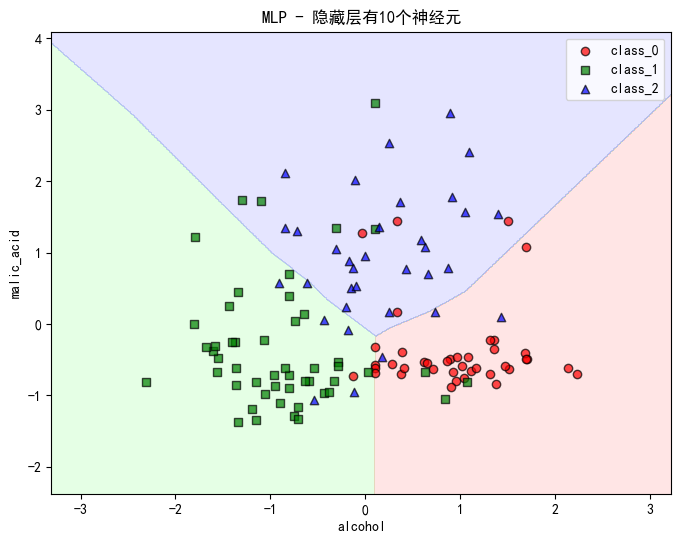

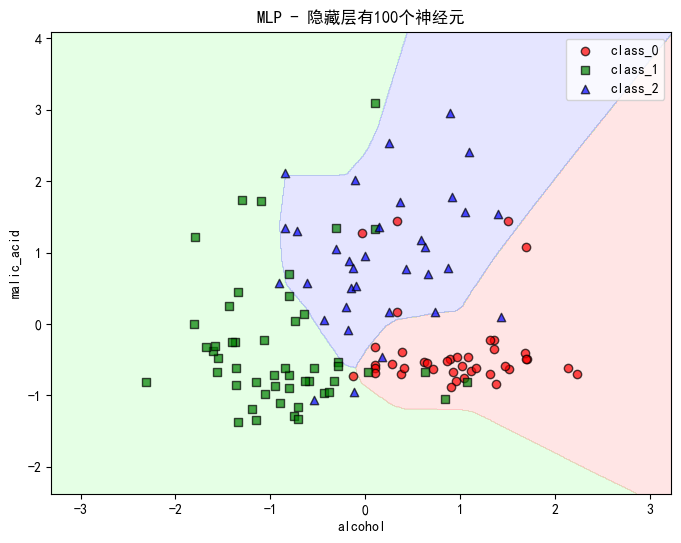

In [5]:
### 使用10个神经元进行训练
# 初始化MLP，隐藏层中有10个神经元
mlp_10 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                       solver='adam', alpha=0.0001, random_state=42, max_iter=1000)
mlp_10.fit(X_train_scaled, y_train)

# 绘制决策边界
plot_decision_boundaries(mlp_10, X_train_scaled, y_train, 'MLP - 隐藏层有10个神经元')

### 使用100个神经元进行训练
# 初始化MLP，隐藏层中有100个神经元
mlp_100 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                        solver='adam', alpha=0.0001, random_state=42, max_iter=1000)
mlp_100.fit(X_train_scaled, y_train)

# 绘制决策边界
plot_decision_boundaries(mlp_100, X_train_scaled, y_train, 'MLP - 隐藏层有100个神经元')

### 讨论2：网络深度的影响

接下来，我们通过增加隐藏层的数量来增加网络的深度，同时保持每个层中的神经元数量不变。

- **隐藏层配置**：2个隐藏层
- **每层神经元数量**：10个
- **激活函数**：ReLU
- **正则化（alpha）**：0.0001
- **求解器**：Adam
- **随机种子**：42

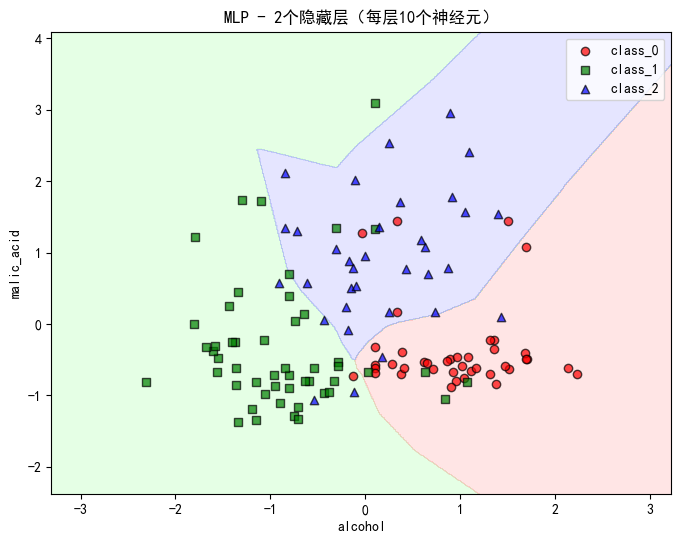

In [6]:
### 使用2个隐藏层（每层10个神经元）进行训练
# 初始化MLP，包含2个隐藏层，每层10个神经元
mlp_depth_2 = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',
                            solver='adam', alpha=0.0001, random_state=42, max_iter=1000)
mlp_depth_2.fit(X_train_scaled, y_train)

# 绘制决策边界
plot_decision_boundaries(mlp_depth_2, X_train_scaled, y_train, 'MLP - 2个隐藏层（每层10个神经元）')

#### 与讨论1的比较

- **单层（10个神经元）** vs **两层（每层10个神经元）**：
  - 增加深度使网络能够学习到更抽象的特征。
  - 两层的决策边界比单层稍微复杂，提供了比单层更好的分类性能，尽管在特定数据集上这种改进可能是微小的。
  - 增加深度能提高模型的能力，而不必大幅增加参数数量。
- **增加复杂度**：添加更多的层可以为网络提供更强的能力来建模复杂的模式。
- **性能提升**：一般来说，深度网络能带来更好的分类准确性，尽管提升可能是边际的，具体取决于数据集。

### 讨论3：激活函数的影响

接下来，我们将更改激活函数，观察它对决策边界的影响，同时保持网络深度与讨论2相同。

- **隐藏层配置**：2个隐藏层
- **每层神经元数量**：10个
- **激活函数**：Tanh vs ReLU
- **正则化（alpha）**：0.0001
- **求解器**：Adam
- **随机种子**：42

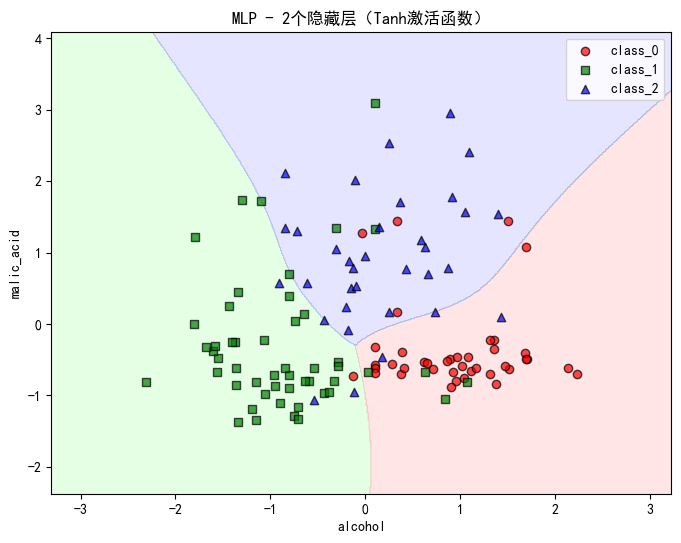

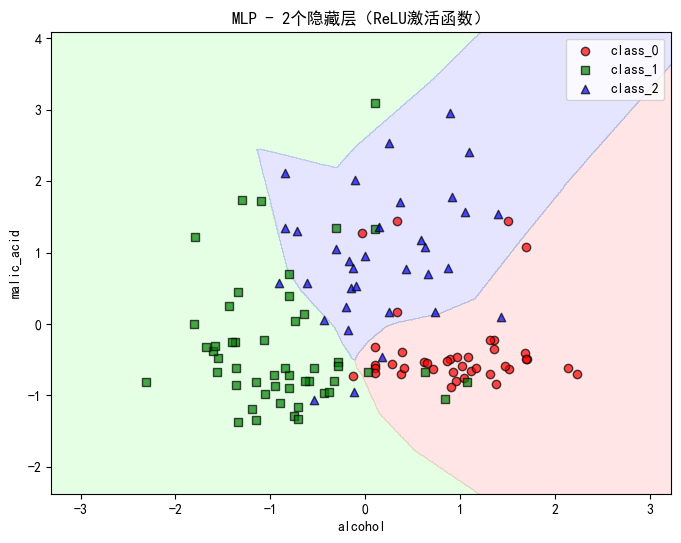

In [7]:
### 使用Tanh激活函数进行训练

# 初始化MLP，包含2个隐藏层，每层10个神经元，激活函数为tanh
mlp_tanh = MLPClassifier(hidden_layer_sizes=(10, 10), activation='tanh',
                         solver='adam', alpha=0.0001, random_state=42, max_iter=1000)
mlp_tanh.fit(X_train_scaled, y_train)

# 绘制决策边界
plot_decision_boundaries(mlp_tanh, X_train_scaled, y_train, 'MLP - 2个隐藏层（Tanh激活函数）')

### 使用ReLU激活函数进行训练
# 重用之前训练的mlp_depth_2
plot_decision_boundaries(mlp_depth_2, X_train_scaled, y_train, 'MLP - 2个隐藏层（ReLU激活函数）')

#### 与讨论2的比较

- **Tanh激活函数**：
  - Tanh函数在零周围是对称的，允许正负激活值。
  - 决策边界可能更平滑，并且可能更符合数据的分布。
  - 在深层网络中可能收敛较慢，并且容易受到梯度消失问题的影响。

- **ReLU激活函数**：
  - ReLU计算效率较高，能有效缓解梯度消失问题。
  - 导致稀疏激活，这有助于提高模型的泛化能力。
  - 与tanh相比，决策边界可能不那么平滑，但通常在实践中提供更好的性能。

- **Tanh与ReLU的比较**：激活函数的选择影响决策边界的形状和平滑度。虽然tanh能捕捉到更细致的模式，ReLU通常在实际应用中提供更好的性能和更快的收敛速度。


### 讨论4：正则化系数的影响
最后，我们将探讨增加正则化系数对决策边界的影响。我们将在讨论3的基础上进行实验。

- **隐藏层配置**：2个隐藏层
- **每层神经元数量**：10个
- **激活函数**：Tanh
- **正则化（alpha）**：增加（例如0.01）
- **求解器**：Adam
- **随机种子**：42

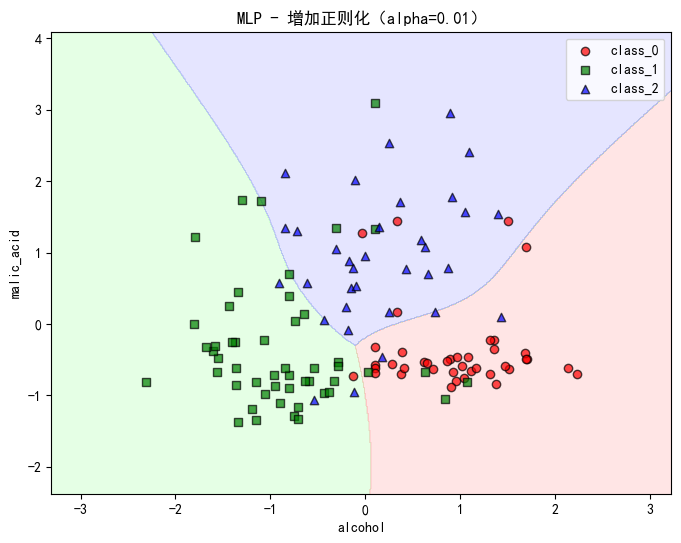

In [8]:
### 使用增加正则化的训练
# 初始化MLP，增加正则化（alpha=0.01）
mlp_reg = MLPClassifier(hidden_layer_sizes=(10, 10), activation='tanh',
                        solver='adam', alpha=0.01, random_state=42, max_iter=1000)
mlp_reg.fit(X_train_scaled, y_train)

# 绘制决策边界
plot_decision_boundaries(mlp_reg, X_train_scaled, y_train, 'MLP - 增加正则化（alpha=0.01）')

### 与讨论3的比较

- **增加正则化（alpha=0.01）**：
  - 正则化为大权重增加了惩罚，抑制了模型变得过于复杂。
  - 决策边界变得更加平滑且不那么复杂，从而减少了过拟合的风险。
  - 如果正则化过强，模型可能会欠拟合，无法捕捉到关键模式。

- **原始正则化（alpha=0.0001）**：
  - 较弱的正则化使模型能够更紧密地拟合数据，捕捉到更多的复杂模式，但也增加了过拟合的风险。


- **正则化强度**：增加正则化系数会通过防止模型拟合训练数据中的噪声来简化决策边界。这是在偏差与方差之间的权衡，较强的正则化会增加偏差但减少方差。


### 总结

通过本次探索，我们观察到不同超参数如何影响MLPClassifier模型在葡萄酒数据集上的分类效果：

1. **隐藏层神经元数量**：
   - **更多神经元**：增加了模型捕捉复杂模式的能力，导致更复杂的决策边界。但也可能增加过拟合的风险。
   - **更少神经元**：简化了决策边界，可能导致欠拟合，无法捕捉到数据中的潜在模式。

2. **隐藏层数量（网络深度）**：
   - **更深的网络**：可以让模型学习到更抽象的特征，提高其建模复杂关系的能力。
   - **较浅的网络**：可能难以捕捉到复杂的模式，但在数据有限时计算上更简洁，且不容易过拟合。

3. **激活函数**：
   - **ReLU**：计算效率高，能有效缓解梯度消失问题，通常提供更快的收敛和更好的性能。
   - **Tanh**：提供更平滑、更细腻的决策边界，但在深层网络中可能收敛较慢，并容易遇到梯度消失问题。

4. **正则化系数**：
   - **较高的正则化（alpha）**：通过抑制过大的权重来简化决策边界，减少过拟合的风险。然而，过强的正则化可能会导致欠拟合。
   - **较低的正则化**：允许模型更紧密地拟合数据，捕捉复杂模式，但也增加了过拟合的风险。

**关键收获**：

- **平衡复杂度**：选择合适的神经元数量、层数、激活函数和正则化参数对于实现最佳模型性能至关重要。
- **可视化帮助理解**：绘制决策边界有助于直观理解超参数如何影响模型的决策过程。
- **迭代调优**：超参数调优通常是一个迭代过程，需要通过实验和验证来找到最适合特定数据集的配置。

通过理解这些超参数之间的相互作用，实践者可以设计出更有效的神经网络，针对其特定的分类任务进行优化。